In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2
import shutil, os

In [17]:
path = r'C:\Users\Pedro\Neural Networks\Neural Networks\Ryan - nikon' # path to all images combined
files = glob.glob(path + "/*.jpg")

dfs_names = []# list to store all images name
for r,d,f in os.walk(path):
    for file in f:
        if file.endswith(".jpeg"):
            file = file.replace(".jpg", "")
            dfs_names.append(file)

print(len(dfs_names))

19


In [18]:
import csv
training_paths=[] # all training images name in one list
training_labels=[] # all training iamges label in one list
testing_paths=[]  # all testing iamges name in one list
testing_labels=[] # all testing iamges label in one list

for index, name in enumerate(dfs_names):
    if index <=7999:
        training_paths.append(name)
        training_labels.append('Circle')
    elif index>7999 and index<= 9999:
        testing_paths.append(name)
        testing_labels.append('Circle')
    if index>9999 and index<= 17999:
        training_paths.append(name)
        training_labels.append('Heptagons')
    elif index>17999 and index<= 19999:
        testing_paths.append(name)
        testing_labels.append('Heptagons')
    if index>19999 and index<= 27999:
        training_paths.append(name)
        training_labels.append('Hexagons')
    elif index>27999 and index<= 29999:
        testing_paths.append(name)
        testing_labels.append('Hexagons')
    if index>29999 and index<= 37999:
        training_paths.append(name)
        training_labels.append('Nonagons')
    elif index>37999 and index<= 39999:
        testing_paths.append(name)
        testing_labels.append('Nonagons')
    if index>39999 and index<= 47999:
        training_paths.append(name)
        training_labels.append('Octagons')
    elif index>47999 and index<= 49999:
        testing_paths.append(name)
        testing_labels.append('Octagons')
    if index>49999 and index<= 57999:
        training_paths.append(name)
        training_labels.append('Pentagons')
    elif index>57999 and index<= 59999:
        testing_paths.append(name)
        testing_labels.append('Pentagons')
    if index>59999 and index<= 67999:
        training_paths.append(name)
        training_labels.append('Squares')
    elif index>67999 and index<= 69999:
        testing_paths.append(name)
        testing_labels.append('Squares')
    if index>69999 and index<= 77999:
        training_paths.append(name)
        training_labels.append('Stars')
    elif index>77999 and index<= 79999:
        testing_paths.append(name)
        testing_labels.append('Stars')
    if index>79999 and index<= 87999:
        training_paths.append(name)
        training_labels.append('Triangles')
    elif index>87999 and index<= 89999:
        testing_paths.append(name)
        testing_labels.append('Triangles')
        
        

In [19]:
print('training_paths='+ str(len(training_paths)) )
print('training_labels='+ str(len(training_labels)) )

print('testing_paths='+ str(len(testing_paths)) )
print('training_labels='+ str(len(testing_labels)) )  

training_paths=19
training_labels=19
testing_paths=0
training_labels=0


In [22]:
#moving training images to a folder named training_set
for f in training_paths:
    from1= r'C:\Users\Pedro\Neural Networks\Neural Networks\Ryan - nikon/' +f
    to1=r'C:\Users\Pedro\Neural Networks\Neural Networks\training_set'
    shutil.move(from1, to1)

In [23]:
#moving the testing_images to a folder named testing_set
for f in testing_paths:
    from1= r'C:\Users\Pedro\Neural Networks\Neural Networks\Ryan - nikon/' +f
    to1=r'C:\Users\Pedro\Neural Networks\Neural Networks\testing_set'
    shutil.move(from1, to1)

In [25]:
#read the images in training_set and convert to gray scale and save it as array

ALLDATAPATH= r"C:\Users\Pedro\Neural Networks\Neural Networks"
CATEGORIES=["training_set"]
for categ in CATEGORIES:
     path = os.path.join(ALLDATAPATH, categ)
     for img in os.listdir(path):
         img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        
      

In [26]:
len(img_array)

960

In [27]:
img_array.shape

(960, 1280)

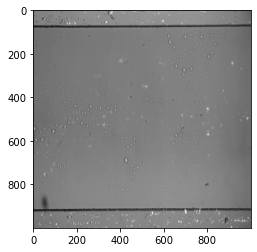

In [32]:
#resize the images to 50x50 as a way of normalizing the data
IMG_SIZE=1000
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')

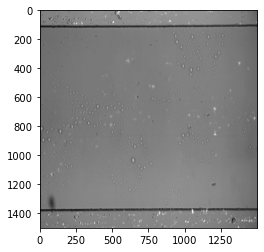

In [33]:
#resize the images to 50x50 as a way of normalizing the data
IMG_SIZE=1500
new_array= cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')


In [ ]:
training_labels[1]

In [ ]:
training_paths[1]

In [ ]:
# i will apply one hot incoding to transfer the labels to a format a machine can read

from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# start with the training labels
training_values=array(training_labels)
# integer encode

label_encoder = LabelEncoder()
training_integer_encoded = label_encoder.fit_transform(training_values)
print(training_integer_encoded[71522])

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
training_integer_encoded = training_integer_encoded.reshape(len(training_integer_encoded), 1)
training_onehot_encoded = onehot_encoder.fit_transform(training_integer_encoded)
print(training_onehot_encoded[71522])

In [ ]:
len(training_onehot_encoded)

In [ ]:
# one hot encode the testing labels
testing_values=array(testing_labels)
# integer encode

label_encoder = LabelEncoder()
testing_integer_encoded = label_encoder.fit_transform(testing_values)
print(testing_integer_encoded[15220])

# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
testing_integer_encoded = testing_integer_encoded.reshape(len(testing_integer_encoded), 1)
testing_onehot_encoded = onehot_encoder.fit_transform(testing_integer_encoded)
print(testing_onehot_encoded[15220])

In [ ]:
len(testing_onehot_encoded)

In [ ]:
# here i will create a trainng dataset that has the images with the assigned labels
training_data=[]
def create_training_data():
    ALLDATAPATH= r"C:\Users\Manaf\Desktop"
    CATEGORIES=["training_set"]
    for categ in CATEGORIES:
        path = os.path.join(ALLDATAPATH, categ)
        for img,label in zip(os.listdir(path),training_onehot_encoded) :
            img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array= cv2.resize(img_array, (100, 100))
            training_data.append([new_array, label])

        
create_training_data()

In [ ]:
len(training_data)

In [ ]:
# here i will create a trainng dataset that has the images with the assigned labels
testing_data=[]
def create_testing_data():
    ALLDATAPATH= r"C:\Users\Manaf\Desktop"
    CATEGORIES=["testing_set"]
    for categ in CATEGORIES:
        path = os.path.join(ALLDATAPATH, categ)
        for img,label in zip(os.listdir(path),testing_onehot_encoded) :
            img_array=cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            new_array= cv2.resize(img_array, (100, 100))
            testing_data.append([new_array, label])

        
create_testing_data()

In [ ]:
len(testing_data)

In [ ]:
import random
random.shuffle(training_data)

In [ ]:
#see now some of the shuffled training_data
for sample in training_data[:10]:
    print(sample[1])

In [ ]:
#split the training_data to X features and ylabels
X=[]
y=[]
for features, label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1, 100,100,1)# array like to feed it to neural network

In [ ]:
#split the testing_data to X features and ylabels
X_test=[]
y_test=[]
for features, label in testing_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1, 100,100,1)# array like to feed it to neural network

In [ ]:
#the size of our training data just to make sure we have the right size
X.shape

In [ ]:
#save training data
import pickle

pickle_out= open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

In [ ]:
#scale training X
X=X/255.0

In [ ]:
#save testing data

pickle_out= open("X_test.pickle","wb")
pickle.dump(X_test, pickle_out)
pickle_out.close()

pickle_out= open("y_test.pickle","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=3, validation_split=0.3)

In [ ]:
import os
import numpy as np
import torch
import glob
import torch.nn as nn
#from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.optim import Adam
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.optim.lr_scheduler import StepLR
#import torchvision
import pathlib

In [ ]:
#checking for device
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
print(device)